In [7]:
#  MULTI LINEAR REGRESSION 
import pandas as pd
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
#summary statistics for each variable
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


skewnessness: 1.7038849799952995
kurtosis: 3.737781189982718


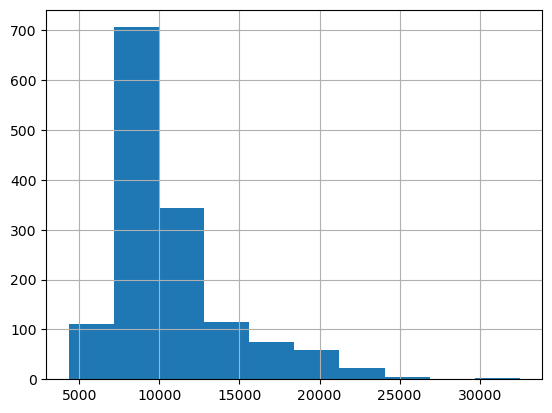

In [5]:
#histogram for continuous variables
df['Price'].hist()
print("skewnessness:",df['Price'].skew())
print("kurtosis:",df['Price'].kurt())


skewnessness: -0.82670187309842
kurtosis: -0.0766324777459908


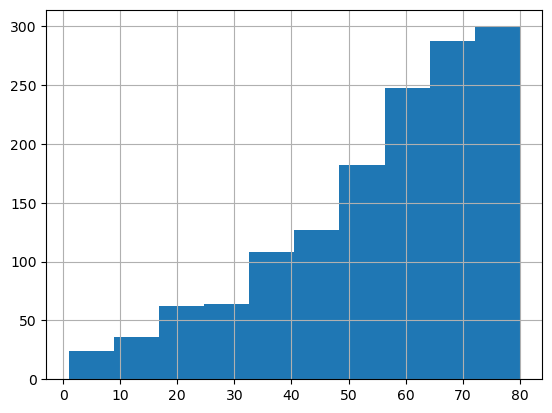

In [6]:
df['Age_08_04'].hist()
print("skewnessness:",df['Age_08_04'].skew())
print("kurtosis:",df['Age_08_04'].kurt())


skewnessness: 1.0159121980877577
kurtosis: 1.6850567186709635


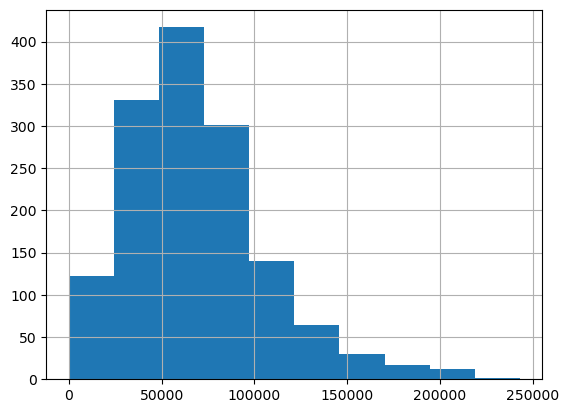

In [7]:
df['KM'].hist()
print("skewnessness:",df['KM'].skew())
print("kurtosis:",df['KM'].kurt())

skewnessness: 0.9558356472519488
kurtosis: 8.836433875040042


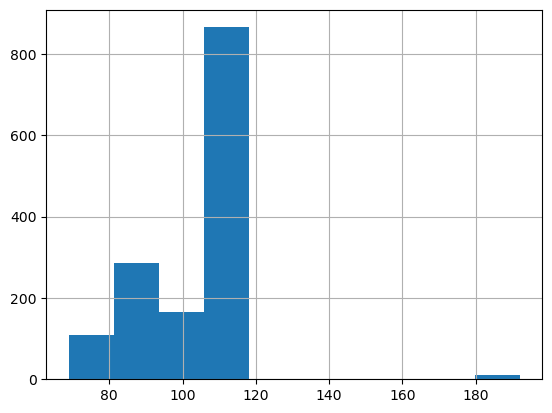

In [8]:
df['HP'].hist()
print("skewnessness:",df['HP'].skew())
print("kurtosis:",df['HP'].kurt())


skewnessness: 3.878196903617749
kurtosis: 13.058596760423951


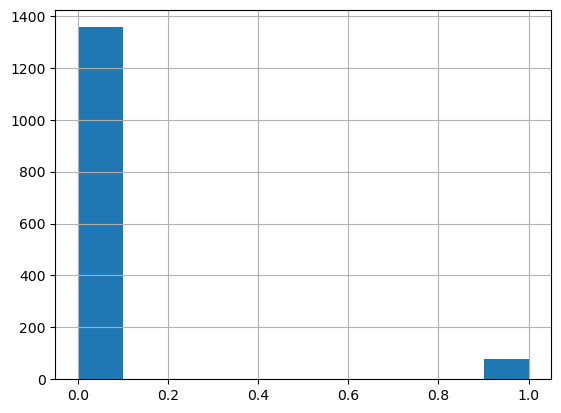

In [9]:
df['Automatic'].hist()
print("skewnessness:",df['Automatic'].skew())
print("kurtosis:",df['Automatic'].kurt())


skewnessness: 27.431792795981686
kurtosis: 930.7112265066064


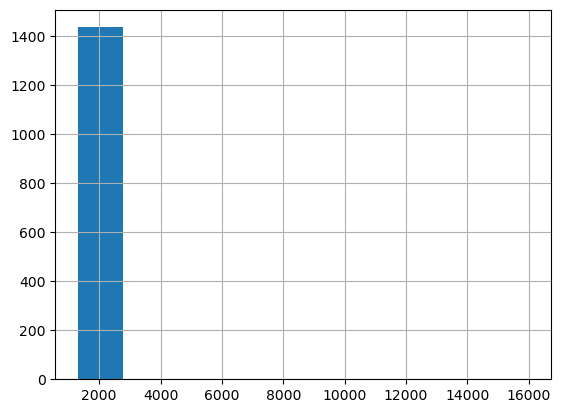

In [10]:
df['cc'].hist()
print("skewnessness:",df['cc'].skew())
print("kurtosis:",df['cc'].kurt())


skewnessness: 3.108639394626062
kurtosis: 19.362901418637517


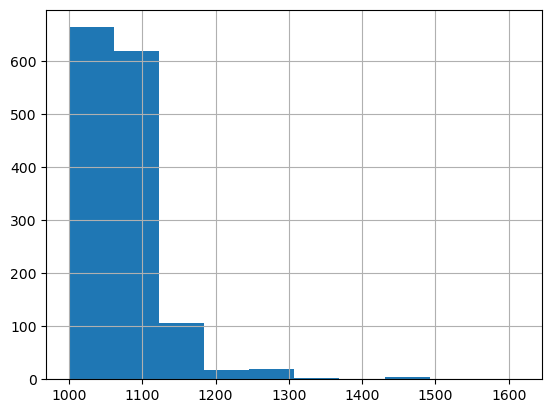

In [12]:
df['Weight'].hist()
print("skewnessness:",df['Weight'].skew())
print("kurtosis:",df['Weight'].kurt())


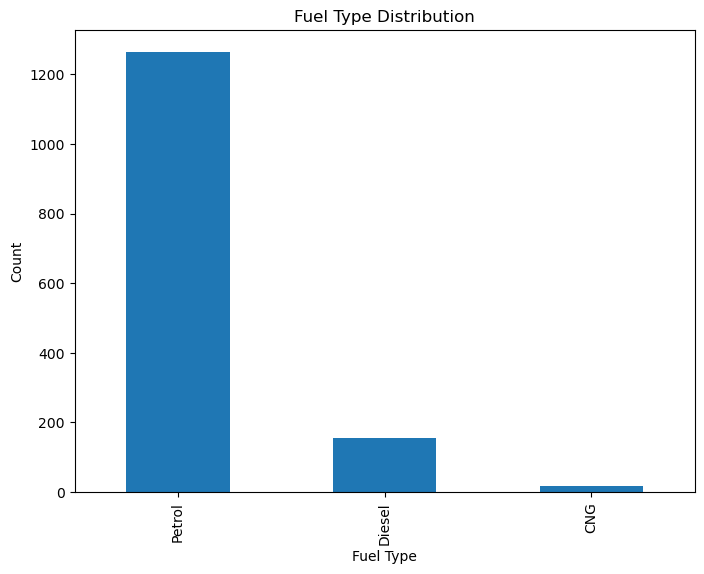

In [14]:
#bar graph for decreate variables
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [16]:
#missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
#separating numerical and categorical variables
df_cat=df[['Price','Age_08_04','KM','HP','cc','Doors','Cylinders','Gears','Weight']]
df_cont=df[["Fuel_Type"]]


In [10]:
#ladel encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cont['Fuel_Type']=le.fit_transform(df_cont['Fuel_Type'])
df_cont=pd.DataFrame(df_cont)
df_cont.head()

C:\Users\nazim\AppData\Local\Temp\ipykernel_20340\2475437071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['Fuel_Type']=le.fit_transform(df_cont['Fuel_Type'])


,Fuel_Type
0,1
1,1
2,1
3,1
4,1


In [11]:
#standardizing all numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_cat=sc.fit_transform(df_cat)
df_cat=pd.DataFrame(df_cat)
df_cat.head()


,0,1,2,3,4,5,6,7,8
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.853577


In [96]:
#concating all transformed variables
df_new=pd.concat([df_cat,df_cont,df['Automatic']],axis=1)
df_new.columns=['Price','Age_08_04','KM','HP','cc','Doors','Cylinders','Gears','Weight','Fuel_Type','Automatic']
df_new.head()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type,Automatic
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,0.0,-0.140425,1.853577,1,0


In [97]:
X = df_new.drop('Price', axis=1)
Y = df_new['Price']

In [98]:
#data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [99]:
# LASSO REGRESSION
from sklearn.linear_model import Lasso
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

#model = Lasso(alpha=1) 
#model = Lasso(alpha=3)
model = Lasso(alpha=4) 
#model = Lasso(alpha=5)

model.fit(X_train,Y_train)
coeff=pd.concat([pd.DataFrame(list(X)),pd.DataFrame(lr_coef),pd.DataFrame(model.coef_)],axis=1)
coeff

,0,0,0
0,Age_08_04,-2847.409497,-0.0
1,KM,-463.996992,-0.0
2,HP,584.003884,0.0
3,cc,181.698177,0.0
4,Doors,NaN,0.0
5,Cylinders,NaN,0.0
6,Gears,NaN,0.0
7,Weight,NaN,0.0
8,Fuel_Type,NaN,-0.0
9,Automatic,NaN,0.0


In [100]:
#redge regression
lr_coef=model.coef_
from sklearn.linear_model import Ridge
model = Ridge(alpha=500)
model.fit(X_train,Y_train)
model.coef_

array([-0.43713731, -0.21783853,  0.10894107,  0.01224901,  0.02697516,
        0.        ,  0.02975237,  0.25075454,  0.00963156,  0.00969817])

In [101]:
coeff=pd.concat([pd.DataFrame(list(X)),pd.DataFrame(lr_coef),pd.DataFrame(model.coef_)],axis=1)
coeff

,0,0,0
0,Age_08_04,-0.0,-0.437137
1,KM,-0.0,-0.217839
2,HP,0.0,0.108941
3,cc,0.0,0.012249
4,Doors,0.0,0.026975
5,Cylinders,0.0,0.000000
6,Gears,0.0,0.029752
7,Weight,0.0,0.250755
8,Fuel_Type,-0.0,0.009632
9,Automatic,0.0,0.009698


In [75]:
X=df_new[['Age_08_04']]    
Y=df['Price']

In [103]:
#model-1:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=np.sqrt(mean_squared_error(Y_test,Y_pred))
r2=r2_score(Y_test,Y_pred)
print("Root Mean squared error:",mse)
print("r2_score:",r2)

Root Mean squared error: 0.3748645118716316
r2_score: 0.8448071658647169


In [104]:
X=df_new[['Age_08_04','Weight']]    
Y=df['Price']

In [105]:
#model-2:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=np.sqrt(mean_squared_error(Y_test,Y_pred))
r2=r2_score(Y_test,Y_pred)
print("Root Mean squared error:",mse)
print("r2_score:",r2)

Root Mean squared error: 0.3748645118716316
r2_score: 0.8448071658647169


In [106]:
X=df_new[['Age_08_04','Weight','KM']]    
Y=df['Price']

In [107]:
#model-3:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=np.sqrt(mean_squared_error(Y_test,Y_pred))
r2=r2_score(Y_test,Y_pred)
print("Root Mean squared error:",mse)
print("r2_score:",r2)

Root Mean squared error: 0.3748645118716316
r2_score: 0.8448071658647169


In [109]:
#cross validation
training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=i)
    model = LinearRegression()
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))



Cross validation - Training error: 1409.98
Cross validation - Test error: 1429.37


In [ ]:
'''conclusion:
Our analysis revealed that Age, KM, HP, CC, Doors, Weight, and Automatic transmission are the predictors of price, 
Based on the analysis, the overall conclusion is:

The linear regression models indicate that Age_08_04 is a significant predictor of Price, 
explaining approximately 84% of the variability in Price. However, the addition of Weight and KM as predictors does not improve the model's performance,
suggesting that these variables may not have a significant impact on Price or their effects may be redundant with Age_08_04.
The models' performance, as measured by RMSE and R-squared, remains consistent across all three models,
indicating that the addition of Weight and KM does not significantly improve the predictive power of the model.

Overall, the analysis suggests that Age_08_04 is a strong predictor of Price, 
but further exploration is needed to identify other relevant predictors or refine the model.
